In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression


In [4]:
cancer = load_breast_cancer()
cancer.data, cancer.target

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

- 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능 영향을 받을 수 있음
- 데이터에 먼주 정규 분포 형태의 표준 스케일링을 적용한 후, 데이터 세트 분리 필요

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, 
                                                    test_size = 0.3,
                                                    random_state = 0)

In [9]:
# 모델링 및 평가

from sklearn.metrics import accuracy_score, roc_auc_score

# 모델링
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(X_train, y_train)

# 예측
lr_preds = lr_clf.predict(X_test)

print(f'accuracy: {round(accuracy_score(y_test, lr_preds),4)}, roc_auc: {round(roc_auc_score(y_test,lr_preds),4)}')


accuracy: 0.9766, roc_auc: 0.9716


#### 과제1: 
여러개의 solver 값 별로 LogisticRegression 학습 후 성능 평가(최적화 방안 찾기 )- accuracy, roc
- 특정 solver는 최적화에 상대적으로 많은 반복 횟수가 필요할 수 있으므로, max_iter값을 600으로 설정하여 회귀 계수를 최적화 하도록 함

In [89]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [94]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# cancer클래스 객체화
cancer = load_breast_cancer()

# 데이터 정규화: 
## 선형 회귀 계열의 로지스틱 회귀는 데이터의 정규 분포도에 따라 예측 성능에 영향을 받을 수 있으므로 데이터 표준화 필요
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 학습/검증용 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, 
                                                    test_size = 0.3,
                                                    random_state = 0)

# 모델링 및 학습과 예측
solvers = ['lbfgs' ,'liblinear','newton-cg','sag','saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver = solver, max_iter = 600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # 정확도, roc곡선 측정
    accuracy = accuracy_score(y_test, lr_preds)
    roc_auc = roc_auc_score(y_test, lr_preds)
    
    print(f'solver: {solver}, accuracy :{round(accuracy, 4)}, roc_auc: {round(roc_auc, 4)}')
    print('\n')

solver: lbfgs, accuracy :0.9766, roc_auc: 0.9716


solver: liblinear, accuracy :0.9825, roc_auc: 0.9795


solver: newton-cg, accuracy :0.9766, roc_auc: 0.9716


solver: sag, accuracy :0.9825, roc_auc: 0.9795


solver: saga, accuracy :0.9825, roc_auc: 0.9795




- solver 파라미터를 liblinear, sag, saga일 경우 정확도가 0.9825, ROC-AUC가 0.797FH lbfgs, newton-cg에 비해 상대적으로 성능 수치가 높게 나옴
- 다만, 데이터 세트가 워낙 작기 때문에 크게 의미있는 결과는 아님

#### 과제2: 
parameter을 이용해 gridsearchcv로 최적 하이퍼파라미터 및 평균 정확도를 구하기
- penalty 파라미터: 규제의 유형 설정, L2/ L1
- c 파라미터: 규제 강도 조절하는 alpha 값의 역수, c값이 작을수록 규제 강도가 큼

In [97]:
from sklearn.model_selection import GridSearchCV

params = {'solver': ['liblinear', 'lbfgs'],
          'penalty': ['l2','l1'],
          'C': [0.01, 0.1, 1, 5, 10]}

# 모델 객체화
lr_clf = LogisticRegression()

# gridsearchcv 실행
grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)

# 모델 최적화
grid_clf.fit(data_scaled, cancer.target)
print(f'최적 하이퍼 파라미터: {grid_clf.best_params_}, 최적 평균 정확도: {grid_clf.best_score_:.3f}')

최적 하이퍼 파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도: 0.979


## 회귀트리

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

In [12]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [15]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
# 보스턴데이터로 데이터프레임 형성

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target

bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
# x, y 데이터 분류(데이터프레임형태)
y_target = bostonDF['PRICE']
X_data = bostonDF.drop('PRICE', axis = 1)

# 랜덤포레스트회귀트리 모델링
rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)

# 5개의 폴드별 최소오차제곱합 구하기( 마이너스로 나옴 )
neg_mse_scores = cross_val_score(rf, X_data, y_target, 
                                 scoring = 'neg_mean_squared_error', 
                                 cv = 5)

# 5개의 폴드별 최소오차제곱합의 제곱근값 구하기
rmse_scores = np.sqrt(-1 * neg_mse_scores)

# 전체 폴드의 평균 오차제곱합 구하기
avg_mse = np.mean(rmse_scores)


print(np.round(neg_mse_scores, 2))
print(np.round(rmse_scores, 2))
print(np.round(avg_mse, 2))

[ -7.88 -13.14 -20.57 -46.23 -18.88]
[2.81 3.63 4.54 6.8  4.34]
4.42


#### 과제3: 
회귀트리 모델들을 이용하여 모델링 및 평가 수행하기
(사용자함수 생성: def get_model_cv_prediction(model, X_data, y_target))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = )


## Regression 실습_ Bike Sharing Demand

https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
```
datetime : 날짜
    - year : 년 (0: 2011, 1:2012)
    - mnth : 월 ( 1 ~ 12)
    - hr : 시(0 ~ 23)
season : 계절 (1:봄철, 2:여름, 3:가을, 4:겨울)
holiday : 날씨의 날이 휴일인지 아닌지
workingday : 요일이 주말도 공휴일도 아닌 경우 1, 그렇지 않은 경우 0
weather:
    - 1: 맑음, 약간 흐림, 약간 흐림
    - 2: 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간의 구름, 안개
    - 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
    - 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개
temp : 섭씨로 나타낸 표준화된 온도, 값은 (tt min)/(t max-t min), t min=-8, t_max=+39(시간 단위로만 )를 통해 파생됨
atemp: 섭씨 단위로 표준화된 느낌 온도, 값은 (tt min)/(t max-t min), t min=-16, t_max=+50(시간 단위로만 )을 통해 파생됨
humidity: 표준화된 습도, 값은 100(최대)
windspeed: 정규화된 풍속, 값은 67(최대)
casual: 캐주얼 사용자 수
register: 등록된 사용자 수
cnt: 일반 및 등록 자전거를 포함한 총 대여 자전거 수
```

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
bike_df = pd.read_csv('bike_train.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [43]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [44]:
bike_df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

### 데이터 전처리

#### 새로운 컬럼 생성

In [45]:
# 문자열을 datetime 타입으로 변경

bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# 연, 월, 일로 나누어줌
bike_df['year'] = bike_df['datetime'].apply(lambda x: x.year)
bike_df['month'] = bike_df['datetime'].apply(lambda x: x.month)
bike_df['day'] = bike_df['datetime'].apply(lambda x: x.day)
bike_df['hour'] = bike_df['datetime'].apply(lambda x: x.hour)

bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


#### 불필요한 컬럼 삭제

In [46]:
bike_df.drop(['datetime','casual','registered'], axis = 1, inplace = True)
bike_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


#### 시각화

In [47]:
bike_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

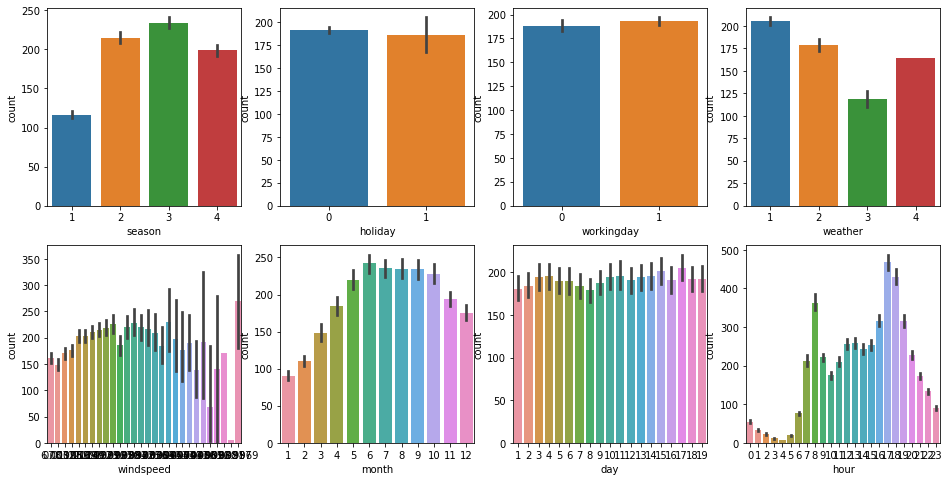

In [48]:
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
cat_features = ['season', 'holiday', 'workingday', 'weather',
                'windspeed', 'month', 'day', 'hour']

for i,feature in enumerate(cat_features):
    row = int(i // 4)
    col = i % 4
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])

<AxesSubplot:xlabel='temp', ylabel='count'>

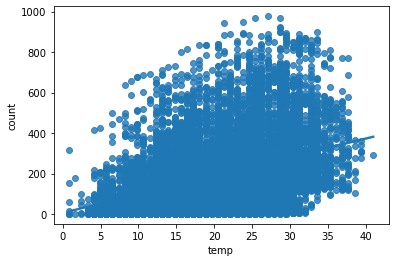

In [85]:
sns.regplot(x = 'temp', y = 'count', data = bike_df)

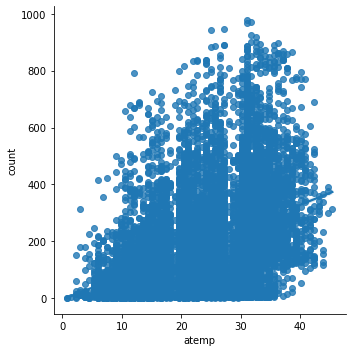

In [87]:
sns.lmplot(x = 'atemp', y = 'count', data = bike_df)

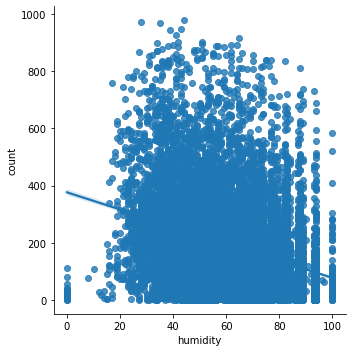

In [88]:
sns.lmplot(x = 'humidity', y = 'count', data = bike_df)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환시 null값 등의 이슈로 log()가 아닌 log1p()를 이용하여 RMSLE를 계산
# 로그변환 후 오차제곱합
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 로그변환 안했을 경우 오차제곱합
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))


def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    
    print(f'rmsle: {round(rmsle_val, 4)}, rmse: {round(rmse_val, 4)}, mae:{round(mae_val,4)}')

In [83]:
# 로그변환, 모델 학습/예측/평가
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 학습/테스트용 데이터 나누기
y_target = bike_df['count']
X_features = bike_df.drop('count', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.3,
                                                    random_state = 0)

# 모델링
lr_reg = LinearRegression()
# 학습
lr_reg.fit(X_train, y_train)
# 예측
pred = lr_reg.predict(X_test)

# 평가
evaluate_regr(y_test, pred)

rmsle: 1.1647, rmse: 140.8996, mae:105.9244


<AxesSubplot:>

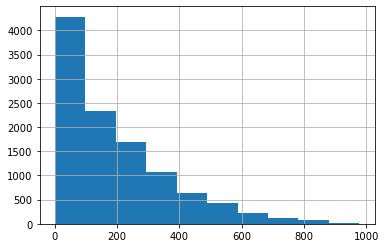

In [66]:
y_target.hist()

<AxesSubplot:>

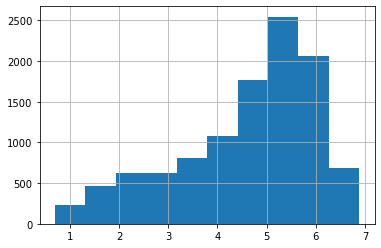

In [64]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

#### 과제4 : 
상기 사례에 대해 로그변환을 수행한 후 모델링 및 평가 수행

#### 과제5:
상기 사례에 대해 추가로 카테고리형 변수에 대해 인코딩 적용 후 모델링 및 평가 수행하기(lr, ridge, lasso 적용)

#### 과제 6:
회귀트리 모델들을 적용하여 모델링 및 평가 수행하기